## Analyzing the properties and distribution of the sections

The goal is to test if training sections and report sections are well-distributed or if they need modifications

Key take aways:
- initial section distribution were skewed toward small sections (number of active elements is chosen as the metric)
- considering sections get smaller through the simulation, I decided to create a new section list
- a new section list is created using ABC database with a close to uniform distribution of section will respect to their active elements
- a new report section list is created that is uniformly distributed in section range

In [305]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import imageio
import random
import collections
import cv2
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [38]:
def load_sections(img_path):
    sections = []
    for path in glob.glob(img_path+'*.png'):
        img = np.asarray(imageio.imread(path))/255
        img = img.astype(np.uint8)
        sections.append(img.reshape(img.shape+(1,)))
    return sections

In [86]:
train_sections = load_sections('../Sections/Database_32x32/')
report_sections = load_sections('../Sections/Database_32x32/Report/')

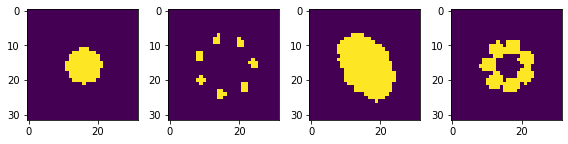

In [74]:
n_samples = 4
fig, axes = plt.subplots(figsize=(8.0, n_samples* 8.0) , nrows=1, ncols=n_samples) 
samples = random.choices(train_sections, k = n_samples)
for i in range(n_samples):
    axes[i].imshow(samples[i].reshape(32,32))
plt.tight_layout()    
plt.show()

In [88]:
n_pixels_train = [np.sum(section>0.5) for section in train_sections]
n_pixels_train_mean = np.mean(n_pixels_train)
n_pixels_report = [np.sum(section>0.5) for section in report_sections]

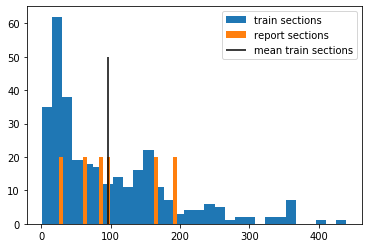

In [123]:
fig, ax = plt.subplots()
res = ax.hist(n_pixels_train, bins=30, label='train sections')
plt.vlines(n_pixels_train_mean, 0, 50, label='mean train sections')
res = ax.hist(n_pixels_report*20, bins=30, label='report sections')
plt.legend()
plt.show()

## Improved database

In [402]:
train_sections = load_sections('../Sections_imp/Database_32x32/')

In [403]:
len(train_sections)

358

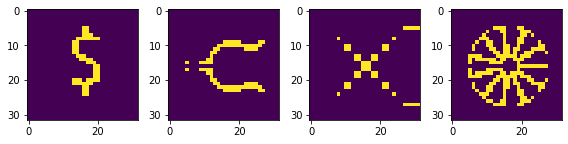

In [404]:
n_samples = 4
fig, axes = plt.subplots(figsize=(8.0, n_samples* 8.0) , nrows=1, ncols=n_samples) 
samples = random.choices(train_sections, k = n_samples)
for i in range(n_samples):
    axes[i].imshow(samples[i].reshape(32,32))
plt.tight_layout()
plt.show()

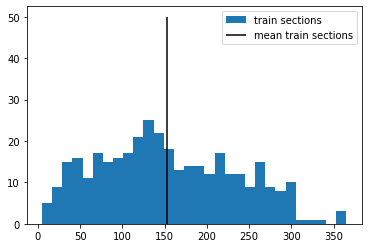

In [406]:
n_pixels_train = [np.sum(section>0.5) for section in train_sections]
n_pixels_train_mean = np.mean(n_pixels_train)
fig, ax = plt.subplots()
res = ax.hist(n_pixels_train, bins=30, label='train sections')
plt.vlines(n_pixels_train_mean, 0, 50, label='mean train sections')
plt.legend()
plt.show()

## Make section distribution uniform

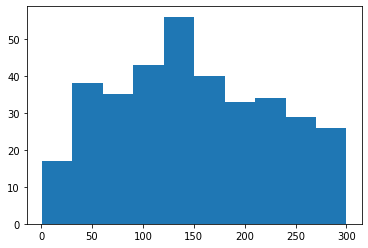

In [428]:
fig, ax = plt.subplots()
res = ax.hist(n_pixels_train, bins=10, range=(1,300.), label='train sections')

In [430]:
bins = 10
max_per_bin = 40
bins_range = np.linspace(1, 300., bins+1)
bined_sections = []
new_sections = []
for i in range(bins):
    if i == bins-1:
        bin_section = [section for section in train_sections if (np.sum(section>0.5) >= bins_range[i])]
    else:
        bin_section = [section for section in train_sections if (np.sum(section>0.5) < bins_range[i+1] and np.sum(section>0.5) >= bins_range[i])]
    if len(bin_section)>max_per_bin:
        sec = random.sample(bin_section, max_per_bin)
    else:
        sec = bin_section.copy()
    bined_sections.append(bin_section)
    new_sections = new_sections + sec
new_n_pixels = [np.sum(section>0.5) for section in new_sections]
new_n_pixels_train_mean = np.mean(new_n_pixels)

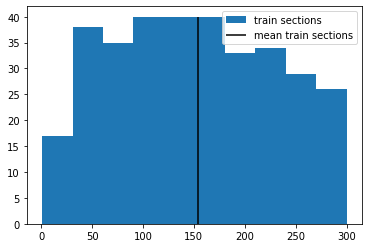

In [594]:
fig, ax = plt.subplots()
res = ax.hist(new_n_pixels, bins=10, range=(1, 300.), label='train sections')
plt.vlines(new_n_pixels_train_mean, 0, 40, label='mean train sections')
plt.legend()
plt.show()

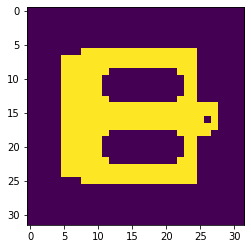

In [668]:
search_bin = 9
report = random.choice(bined_sections[search_bin])
plt.imshow(report.reshape(32,32))

In [434]:
new_report_sections = []

In [669]:
new_report_sections.append(report)

In [672]:
n_pixels_report = [np.sum(section>0.5) for section in new_report_sections]

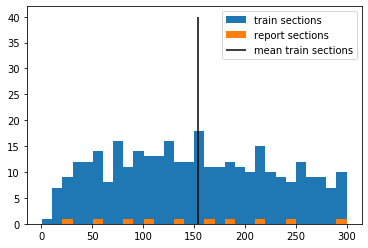

In [679]:
fig, ax = plt.subplots()
res = ax.hist(new_n_pixels, bins=30, range=(1, 300.), label='train sections')
plt.vlines(new_n_pixels_train_mean, 0, 40, label='mean train sections')
res = ax.hist(n_pixels_report, bins=30, range=(1, 300.), label='report sections')
plt.legend()
plt.show()

### Saving new sections

In [684]:
for i in range(len(new_sections)):
    cv2.imwrite('New_database/'+str(i)+'.png', new_sections[i]*255)
    
for i in range(len(new_report_sections)):
    cv2.imwrite('New_database/Report/'+str(i)+'.png', new_report_sections[i]*255)